２次元のパーティクルフィルタによる自己位置推定

パーティクルは星型の黄色い点、真値は青，推定値はオレンジ  
2次元の単純な移動と観測を計算し、パーティクルフィルタを使用して自己位置推定を行う

実行環境  
Python : 3.8.10  
Numpy  : 1.23.5  

`def predict`はパーティクルに対して移動  
`def update`は観測データを元に各パーティクルの尤度を計算，重みを更新  
`def resample`はリサンプリングを行い，重みに基づいてパーティクルを再配置  
`def get_estimate`はパーティクルの重みを考慮して推定  


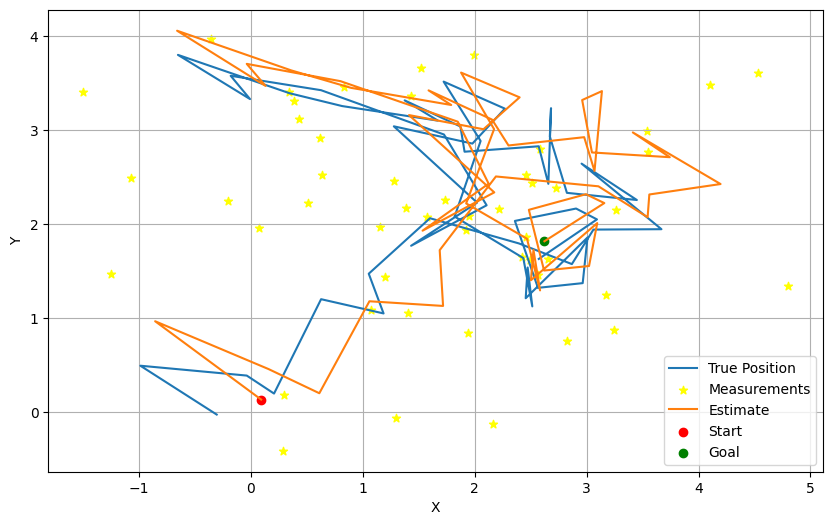

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# パーティクルフィルタのクラスを定義
class MCL2D:
    def __init__(self, initial_position, num_particles):
        self.num_particles = num_particles
        self.particles = np.random.normal(initial_position, 1, size=(num_particles, 2))
        self.weights = np.ones(num_particles) / num_particles

    def predict(self, movement):
        # パーティクルに対しての移動
        self.particles += movement

    def update(self, measurement, measurement_noise=1.0):
        # 尤度の計算
        likelihood = np.exp(-0.9 * np.sum(((self.particles - measurement) / measurement_noise)**2, axis=1))
        self.weights *= likelihood
        self.weights /= np.sum(self.weights)  # 重みの正規化

    def resample(self):
        # リサンプリング
        indices = np.random.choice(self.num_particles, size=self.num_particles, p=self.weights)
        self.particles = self.particles[indices]
        self.weights = np.ones(self.num_particles) / self.num_particles

    def get_estimate(self):
        # 推定値の計算
        estimate = np.average(self.particles, axis=0, weights=self.weights)
        return estimate


initial_position = np.array([0, 0])  # 初期位置 (x, y)
num_particles = 1000  # パーティクル数

particle_filter = MCL2D(initial_position, num_particles)

# 移動と観測データの準備
movements = np.random.normal(0, 0.5, size=(50, 2))  # 50回の移動
true_positions = np.cumsum(movements, axis=0)  # 真の位置（移動の累積和）
measurements = true_positions + np.random.normal(0, 1, size=(50, 2))  # 観測データ（真の位置にノイズを加えたもの）

estimated_positions = []

# パーティクルフィルタの実行
for measurement, movement in zip(measurements, movements):
    particle_filter.predict(movement)
    particle_filter.update(measurement)
    particle_filter.resample()

    estimate = particle_filter.get_estimate()
    estimated_positions.append(estimate)

# 結果の可視化
estimated_positions = np.array(estimated_positions)
plt.figure(figsize=(10, 6))
plt.plot(true_positions[:, 0], true_positions[:, 1], label='True Position')
plt.scatter(measurements[:, 0], measurements[:, 1], label='Measurements', color='yellow', marker='*')
plt.plot(estimated_positions[:, 0], estimated_positions[:, 1], label='Estimate')
# ロボットのはじめと終わりの位置
plt.scatter(estimated_positions[0, 0], estimated_positions[0, 1], label='Start', color='red', marker='o')
plt.scatter(estimated_positions[49, 0], estimated_positions[49, 1], label='Goal', color='green', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()
